<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/image_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install python-mnist

  Stored in directory: /root/.cache/pip/wheels/28/29/36/408f83545a511c43d03ef997a1dc99b49ccd5f9f306ed92468
Successfully built python-mnist


In [0]:
from google.colab import files

In [4]:
ul = files.upload()

Saving train-images-idx3-ubyte.gz to train-images-idx3-ubyte.gz


In [0]:
import gzip
f = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 60000

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

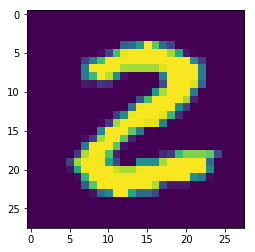

In [48]:
import matplotlib.pyplot as plt
image = np.asarray(data[25]).squeeze()
plt.imshow(image)
plt.show()

In [36]:
len(data)

5

In [0]:
from sklearn.decomposition import PCA
import pandas as pd


df = pd.DataFrame(data[0].flatten())
for i in range(0,len(data)):
  df[i] = data[i].flatten()
df = df.T 

In [50]:
df.shape

(60000, 784)

In [0]:
pca = PCA(0.95)
lower_dimensional_data = pca.fit_transform(df)

In [52]:
pca.n_components_

154

In [0]:
approximation = pca.inverse_transform(lower_dimensional_data)

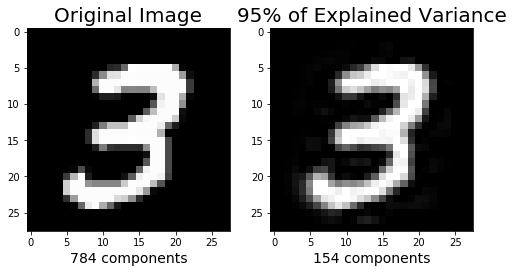

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(np.array(df.loc[7]).reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[7].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

In [74]:
type(lower_dimensional_data)

numpy.ndarray

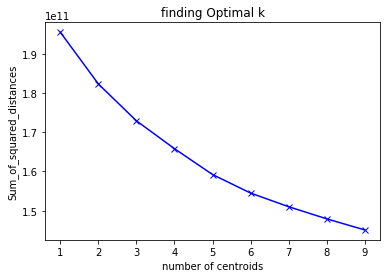

In [72]:
#we don't need to do this as we know there should be 10 clusters, but jsut taking a look
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(lower_dimensional_data)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('number of centroids')
plt.ylabel('Sum_of_squared_distances')
plt.title('finding Optimal k')
plt.show()

In [75]:
n = 10
LDD = pd.DataFrame(lower_dimensional_data)
kmeans = KMeans(n_clusters=n)
kmeans.fit(lower_dimensional_data)
labels = kmeans.labels_
LDD['cluster'] = pd.Series(labels)

LDD.head()

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,cluster
0,123.932589,-312.674262,-24.514052,-555.757958,-27.296668,-232.476284,233.995733,159.799494,-363.515021,198.428077,...,-53.230860,-31.833660,0.726879,16.508330,-25.815422,-28.378215,55.018998,-20.083274,39.589952,5
1,1011.718376,-294.857038,596.339561,-460.766197,-827.275222,-181.950528,-45.020478,-104.969592,40.459118,150.968899,...,-63.505051,46.836698,34.531079,25.926578,27.867842,28.420288,7.241299,-12.457809,-12.743231,9
2,-51.849608,392.173153,-188.509749,521.011347,-306.680729,-1.835346,-859.047199,368.591875,-114.546074,-178.508144,...,-91.034657,26.476838,13.189897,102.929416,-6.051062,74.464076,-54.195822,48.479797,-73.278263,8
3,-799.127037,-607.197217,273.651240,105.878237,-1.853226,699.654696,-473.713204,-67.321708,302.731266,11.111365,...,-34.612465,6.437832,7.563749,45.611006,-8.103525,13.624440,36.802572,-15.698541,-36.525392,3
4,-382.754942,730.542867,16.353747,-241.697519,98.161346,43.229727,-91.666599,-405.554885,225.501854,104.112265,...,-10.394836,6.297174,-43.159962,-4.906619,25.015851,-28.875120,-56.621607,-32.981212,-27.399438,0


In [0]:
classmap={0:4,1:2,2:3,3:5,4:0,5:8,6:6,7:1,8:4,9:0}
nl=[]
checklist=list(LDD['cluster'])
for i in range(0,len(LDD['cluster'])):
  temp_v = classmap.get(checklist[i])
  nl.append(temp_v)

In [0]:
LDD['cluster_map']=nl

our classification is 3


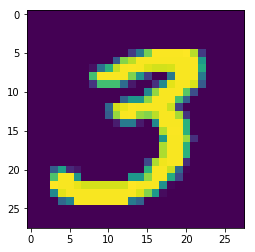

In [196]:
import random
test_number = random.randint(1,60001)
image_test = np.asarray(data[test_number]).squeeze()
plt.imshow(image_test)
print('our classification is',LDD['cluster_map'][test_number])
plt.show()

In [0]:
#this sort of works but would work much better if we used the training labels and a different
#learning method as people write numbers very differently